In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
#from tensorflow.keras.layers import Conv2D, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import random
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from fancyimpute import IterativeImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from tensorflow.python.framework import ops
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
ops.reset_default_graph()
random.seed(271828)
np.random.seed(271828)
#import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
tf.random.set_seed(271828)

Using TensorFlow backend.


In [2]:
path = "C:\‏‏PycharmProjects\PTSD\Data\PTSD.xlsx"
df = pd.read_excel(path)
#combine with specifics of answers
df_pcl2 = pd.read_excel("C:\‏‏PycharmProjects\PTSD\Data\questionnaire6PCL2.xlsx")
df_pcl1 = pd.read_excel("C:\‏‏PycharmProjects\PTSD\Data\questionnaire6PCL1.xlsx")
df = df.merge(df_pcl1, on="ID", how='outer')
df = df.merge(df_pcl2, suffixes=('_pcl1', '_pcl2'), on="ID", how='outer')
# rmoving missing Y's
df = df[~df['PCL_Strict3'].isna()]

## features 

In [3]:

features = ["age", "highschool_diploma", "dyslexia", "ADHD", "T1Acc1t", "T1Acc1n", "T1bias", "phq1", "lot1",
                "trait1",
                "state1", "PCL1", "PCL_Broad1", "PCL_Strict1", "phq2", "lot2", "trait2", "state2", "PCL2", "PCL_Broad2",
                "PCL_Strict2", "cd_risc1", "active_coping1", "planning1", "positive_reframing1", "acceptance1",
                "humor1",
                "religion1", "emotional_support1", "instrumental_support1", "self_distraction1", "denial1",
                "venting1", "substance_use1", "behavioral_disengagement1", "self_blame1", "active_coping2", "planning2",
                "positive_reframing2", "acceptance2", "humor2", "religion2", "emotional_support2",
                "instrumental_support2",
                "self_distraction2", "denial2", "venting2", "substance_use2", "behavioral_disengagement2",
                "self_blame2",
                "trauma_history8_1", "HML_5HTT", "HL_MAOA", "HML_NPY", "COMT_Hap1_recode",
                "COMT_Hap2_recode", "COMT_Hap1_LvsMH", "HML_FKBP5", 'q6.1_INTRU_pcl1', 
                'q6.2_DREAM_pcl1', 'q6.3_FLASH_pcl1', 'q6.4_UPSET_pcl1',
                  'q6.5_PHYS_pcl1', 'q6.6_AVTHT_pcl1', 'q6.7_AVSIT_pcl1', 'q6.8_AMNES_pcl1', 'q6.9_DISINT_pcl1',
                  'q6.10_DTACH_pcl1', 'q6.11_NUMB_pcl1', 'q6.12_FUTRE_pcl1', 'q6.13_SLEEP_pcl1',
                  'q6.14_ANGER_pcl1', 'q6.15_CONC_pcl1', 'q6.16_HYPER_pcl1', 'q6.17_STRTL_pcl1',
                  'q6.1_INTRU_pcl2', 'q6.2_DREAM_pcl2', 'q6.3_FLASH_pcl2', 'q6.4_UPSET_pcl2',
                  'q6.5_PHYS_pcl2', 'q6.6_AVTHT_pcl2', 'q6.7_AVSIT_pcl2', 'q6.8_AMNES_pcl2', 'q6.9_DISINT_pcl2',
                  'q6.10_DTACH_pcl2', 'q6.11_NUMB_pcl2', 'q6.12_FUTRE_pcl2', 'q6.13_SLEEP_pcl2',
                  'q6.14_ANGER_pcl2', 'q6.15_CONC_pcl2', 'q6.16_HYPER_pcl2', 'q6.17_STRTL_pcl2']

In [4]:
discrete_features = ["age", "highschool_diploma", "dyslexia", "ADHD", "phq1", "lot1",
                    "trait1", "state1", "PCL1", "PCL_Broad1", "PCL_Strict1", "phq2", "lot2",
                    "trait2", "state2", "PCL2", "PCL_Broad2", "PCL_Strict2", "cd_risc1", "active_coping1",
                    "planning1", "positive_reframing1", "acceptance1", "humor1", "religion1",
                    "emotional_support1", "instrumental_support1", "self_distraction1", "denial1",
                    "venting1", "substance_use1", "behavioral_disengagement1", "self_blame1", "active_coping2",
                    "planning2", "positive_reframing2", "acceptance2", "humor2", "religion2", "emotional_support2",
                    "instrumental_support2", "self_distraction2", "denial2", "venting2", "substance_use2",
                    "behavioral_disengagement2", "self_blame2", "trauma_history8_1",
                    'q6.1_INTRU_pcl1', 'q6.2_DREAM_pcl1', 'q6.3_FLASH_pcl1', 'q6.4_UPSET_pcl1',
                    'q6.5_PHYS_pcl1', 'q6.6_AVTHT_pcl1', 'q6.7_AVSIT_pcl1', 'q6.8_AMNES_pcl1', 'q6.9_DISINT_pcl1',
                    'q6.10_DTACH_pcl1', 'q6.11_NUMB_pcl1', 'q6.12_FUTRE_pcl1', 'q6.13_SLEEP_pcl1',
                    'q6.14_ANGER_pcl1', 'q6.15_CONC_pcl1', 'q6.16_HYPER_pcl1', 'q6.17_STRTL_pcl1',
                    'q6.1_INTRU_pcl2', 'q6.2_DREAM_pcl2', 'q6.3_FLASH_pcl2', 'q6.4_UPSET_pcl2',
                    'q6.5_PHYS_pcl2', 'q6.6_AVTHT_pcl2', 'q6.7_AVSIT_pcl2', 'q6.8_AMNES_pcl2', 'q6.9_DISINT_pcl2',
                    'q6.10_DTACH_pcl2', 'q6.11_NUMB_pcl2', 'q6.12_FUTRE_pcl2', 'q6.13_SLEEP_pcl2',
                    'q6.14_ANGER_pcl2', 'q6.15_CONC_pcl2', 'q6.16_HYPER_pcl2', 'q6.17_STRTL_pcl2']

In [5]:
genome_features = ["HML_5HTT", "HL_MAOA", "HML_NPY", "COMT_Hap1_recode",
                "COMT_Hap2_recode", "COMT_Hap1_LvsMH", "HML_FKBP5"]
continuous_features = ["T1Acc1t", "T1Acc1n", "T1bias"]

## fill the missing values

In [6]:
df[genome_features] = df[genome_features].fillna(0)
df[continuous_features] = df[continuous_features].fillna(df[continuous_features].mean())
df[discrete_features] = df[discrete_features].fillna(df[discrete_features].median())


## cut off the test set

In [7]:
X, X_out, Y, y_out = train_test_split(df[features], df['PCL_Strict3'], test_size=0.25, random_state=271828, stratify=df['PCL_Strict3'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=271828)
cv = StratifiedKFold(10, random_state=271828)  

## the Model

In [8]:
model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('anova', SelectKBest()),
    ('clf',  SVC(random_state=271828, probability=True))])

grid_params = [{
                'anova__k':[20, 10, 50], 'clf__C':[1,10,100, 0.5],
                'clf__gamma':[0.5,0.1,0.001,1, 0.01], 'clf__kernel':['sigmoid','rbf'],
                'clf__class_weight':[{1:3, 0:1}, {1:1, 0:1}, {1:1, 0:3}]}]


## CV model of roc auc 

In [9]:
scores_auc = GridSearchCV(model, grid_params,  scoring="roc_auc", cv=cv)
scores_auc.fit(X_train, y_train)
#scores = cross_val_score(model, X_train, y_train, scoring="roc_auc", cv=cv)
print("roc_auc", scores_auc.best_score_,"\nparams = ", scores_auc.best_params_)

roc_auc 0.7800518589992274 
params =  {'anova__k': 25, 'clf__C': 1, 'clf__class_weight': {1: 2, 0: 1}, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}


## CV model of precision

In [9]:
scores_f1 = GridSearchCV(model, grid_params,  scoring="f1", cv=cv)
scores_f1.fit(X_train, y_train)
#scores = cross_val_score(model, X_train, y_train, scoring="roc_auc", cv=cv)
print("f1", scores_f1.best_score_,"\nparams = ", scores_f1.best_params_)

f1 0.2365274365274365 
params =  {'anova__k': 20, 'clf__C': 10, 'clf__class_weight': {1: 3, 0: 1}, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}


## CV model of f1

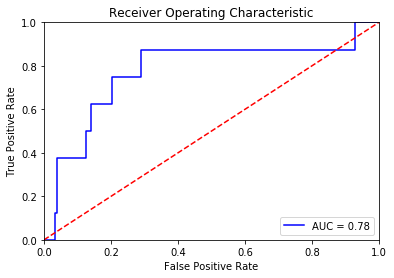

In [17]:
from sklearn.metrics import roc_curve, auc

probs = scores_auc.best_estimator_.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

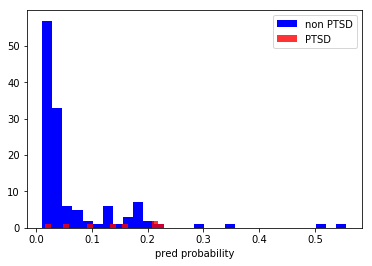

In [19]:
plt.hist(preds[y_test==0], bins=30, color="b", label="non PTSD")
plt.hist(preds[y_test==1], bins=20, alpha=0.8, color="r", label="PTSD")
plt.xlabel('pred probability')
plt.legend();

In [11]:
#scores = cross_val_score(scores_auc.best_estimator_, X_train, y_train, scoring="precision", cv=cv)
#print("precision\n", scores,"\nmean = ", scores.mean())

scores = cross_val_score(scores_f1.best_estimator_, X_train, y_train, scoring="precision", cv=cv)
print("precision\n", scores,"\nmean = ", scores.mean())

precision
 [0.5        0.5        0.         0.         0.         0.
 0.         0.5        0.33333333 1.        ] 
mean =  0.2833333333333333


## predict holdout set

In [12]:
y_pred1 = scores_f1.best_estimator_.predict_proba(X_test)
y_pred2 = scores_auc.best_estimator_.predict_proba(X_test)
y_pred = y_pred1[:, 1]>0.25
print("f1 precision_score =", precision_score(y_test, y_pred), "from ", sum(y_pred))
y_pred = y_pred2[:, 1]>0.25
print("auc precision_score =", precision_score(y_test, y_pred), "from ", sum(y_pred))


f1 precision_score = 0.0 from  1
auc precision_score = 0.0 from  4


In [13]:
y_pred = y_pred1[:, 1]>0.15
print("f1 precision_score =", precision_score(y_test, y_pred), "from ", sum(y_pred))
y_pred = y_pred2[:, 1]>0.15
print("auc precision_score =", precision_score(y_test, y_pred), "from ", sum(y_pred))


f1 precision_score = 0.3333333333333333 from  3
auc precision_score = 0.19047619047619047 from  21


In [14]:
y_pred = y_pred1[:, 1]>0.6
print("f1 precision_score =", precision_score(y_test, y_pred), "from ", sum(y_pred))
y_pred = y_pred2[:, 1]>0.6
print("auc precision_score =", precision_score(y_test, y_pred), "from ", sum(y_pred))


f1 precision_score = 0.0 from  0
auc precision_score = 0.0 from  0


In [15]:
y_pred = y_pred1[:, 1]>0.5
print("f1 precision_score =", precision_score(y_test, y_pred), "from ", sum(y_pred))
y_pred = y_pred2[:, 1]>0.5
print("auc precision_score =", precision_score(y_test, y_pred), "from ", sum(y_pred))


f1 precision_score = 0.0 from  0
auc precision_score = 0.0 from  2
